In [1]:
from panel_segmentation import panel_train as ptrain
import numpy as np
import os
#Set the current working directory as the /examples/ folder. 
os.chdir("./examples")
os.getcwd()

'c:\\Users\\kperry\\source\\repos\\Panel-Segmentation\\examples'

# Model Training

The following example demonstrates how to train a VGG16 model for panel detection. First, create an instance of the TrainPanelSegmentationModel() class.

In [2]:
batch_size= 16
no_epochs =  15
learning_rate = 1e-5
    
paneltrain = ptrain.TrainPanelSegmentationModel(
    batch_size, no_epochs, learning_rate)    

Add in the example training and test sets from the /examples/ folder.

In [3]:
#Use the images/masks from the examples folder
train_data_path = "./Train/Images/"
train_mask_path = "./Train/Masks/"
val_data_path = "./Validate/Images/"
val_mask_path = "./Validate/Masks/"

#Read in the images as 4D numpy arrays 
train_data = paneltrain.loadImagesToNumpyArray(train_data_path)
train_mask = paneltrain.loadImagesToNumpyArray(train_mask_path)
val_data = paneltrain.loadImagesToNumpyArray(val_data_path)
val_mask = paneltrain.loadImagesToNumpyArray(val_mask_path)

Train the segmentation model, and output model statistics.

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 1 steps
Epoch 1/15
6/7 [========================>.....] - ETA: 2:38 - loss: 0.4483 - accuracy: 0.8172 - diceCoeff: 0.0576
Epoch 00001: val_loss improved from -inf to 0.54697, saving model to VGG16_complete_model.h5
7/7 [==============================] - 1208s 173s/step - loss: 0.4680 - accuracy: 0.8200 - diceCoeff: 0.0645 - val_loss: 0.5470 - val_accuracy: 0.8769 - val_diceCoeff: 0.0999
Epoch 2/15
6/7 [========================>.....] - ETA: 2:36 - loss: 0.2950 - accuracy: 0.9124 - diceCoeff: 0.0494
Epoch 00002: val_loss improved from 0.54697 to 0.58345, saving model to VGG16_complete_model.h5
7/7 [==============================] - 1172s 167s/step - loss: 0.2969 - accuracy: 0.9154 - diceCoeff: 0.0486 - val_loss: 0.5835 - val_accuracy: 0.8927 - val_diceCoeff: 0.0458
Epoch 3/15
6/7 [========================>.....] - ETA: 2:26 - loss: 0.2588 - accuracy: 0.9414 - diceCoeff: 0.0380
Epoch 00003: val_loss improve

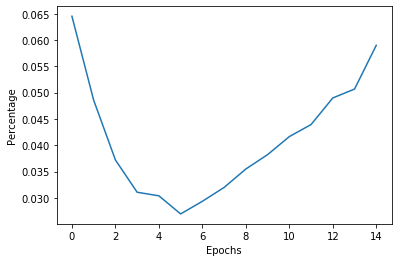

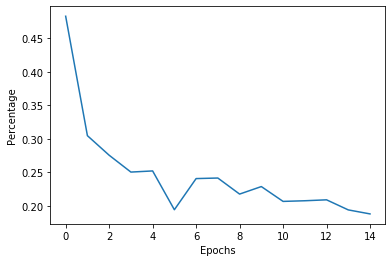

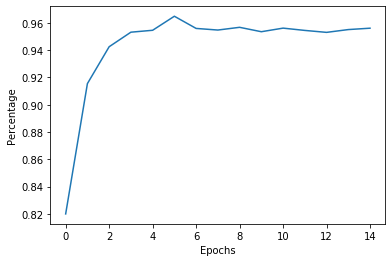

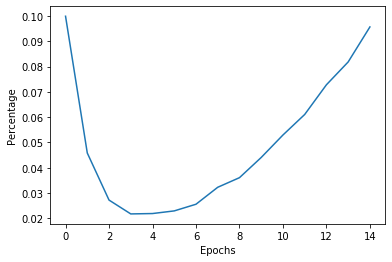

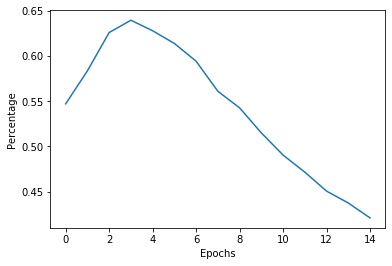

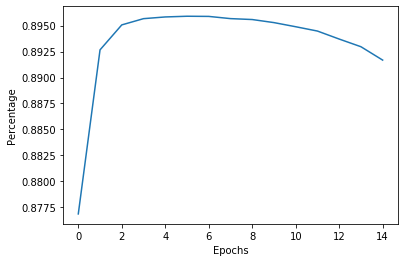

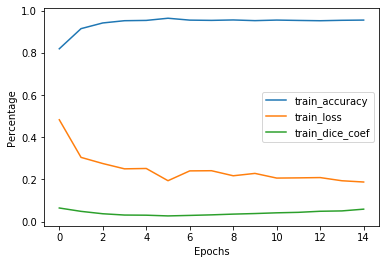

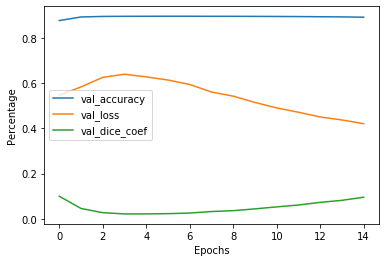

In [4]:
#Train the segmentation model
[mod,results] = paneltrain.trainSegmentation(
    train_data, train_mask, val_data, val_mask)
    
#Display the training statistics
paneltrain.trainingStatistics(results, 1)

Train an instance of the classifier model, which returns a boolean True if a solar array is detected in the image, and False otherwise. Return the statistics related to the trained model.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 640, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 160, 160, 128)     0   

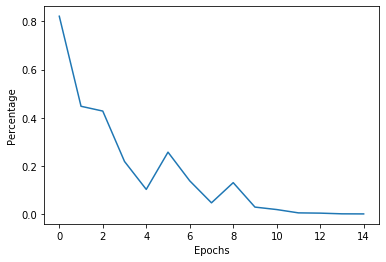

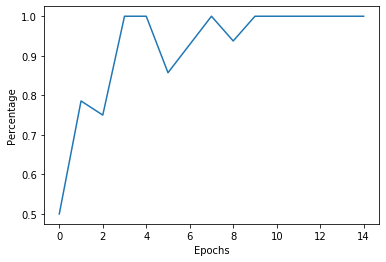

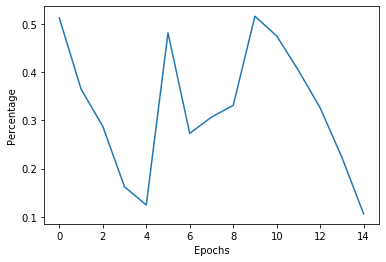

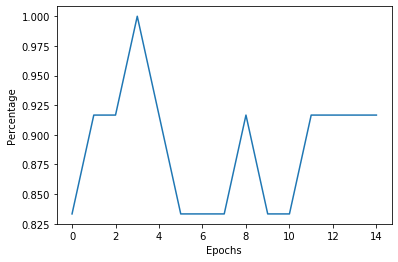

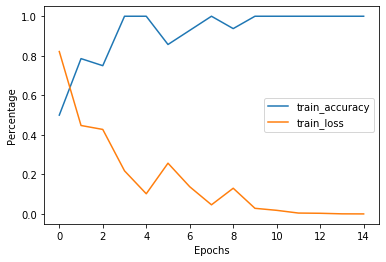

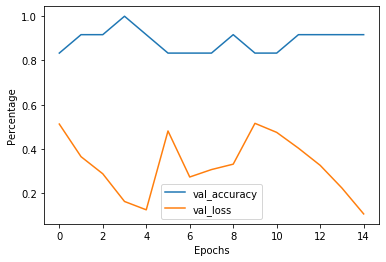

In [5]:
[mod,results] = paneltrain.trainPanelClassifier(
    "./Train_Classifier/", "./Validate_Classifier/")
paneltrain.trainingStatistics(results, 0)